In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats

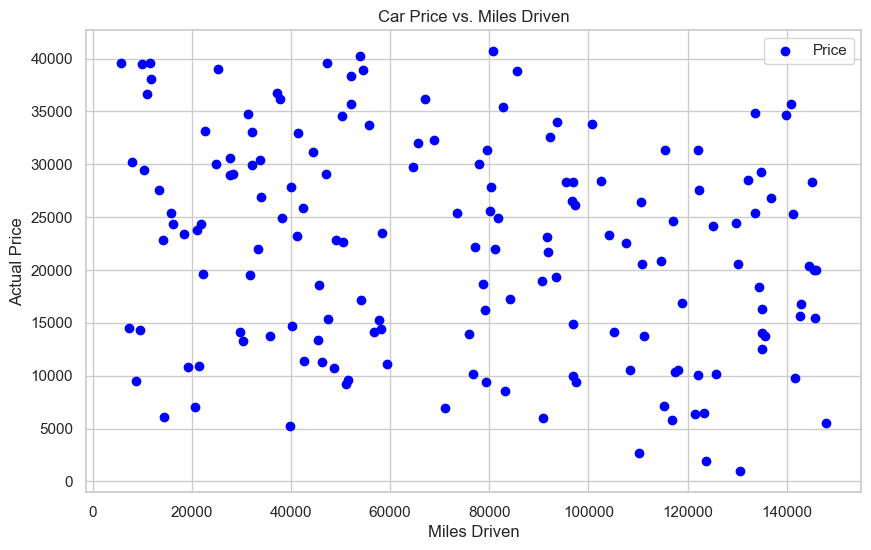

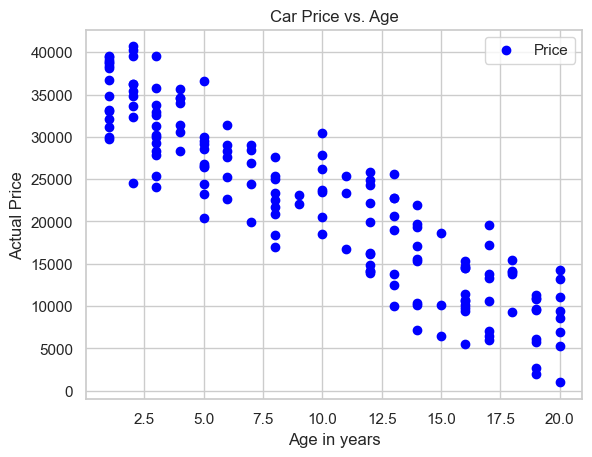

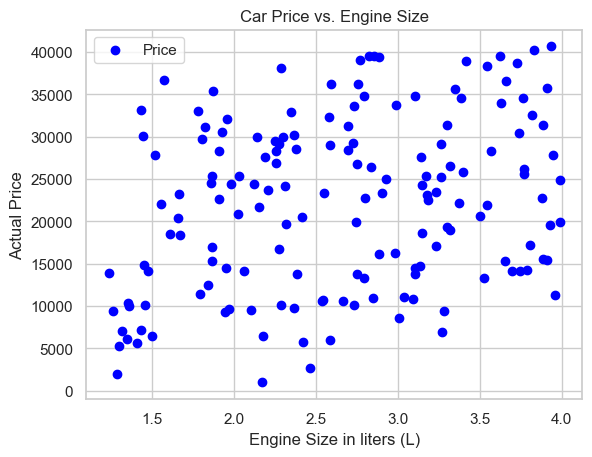

In [26]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 200
miles_driven = np.random.uniform(5000, 150000, n) # Miles driven between 5,000 and 150,000
age = np.random.randint(1, 21, n) # Age between 1 and 20 years
engine_size = np.random.uniform(1.2, 4.0, n) # Engine size between 1.2L and 4.0L

# Compute price with some random noise
price = (30000 - miles_driven * 0.05) + (engine_size * 4000) - (age * 1500) + np.random.normal(0, 2000, n)

# Create DataFrame
data = pd.DataFrame({'miles_driven': miles_driven, 'age': age, 'engine_size':engine_size, 'price': price})

# Split the data (80% training, 20% testing)
X = data[['miles_driven', 'age', 'engine_size']] #Car statistics
y = data['price'] #Target variable (price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10,6))

#Plots Miles Driven vs Actual Price
plt.scatter(X_train['miles_driven'], y_train, color='blue', label='Price')

#Scatteplot title and labels
plt.title('Car Price vs. Miles Driven')
plt.ylabel('Actual Price')
plt.xlabel('Miles Driven')
plt.legend()  # Now the legend will include the label from scatter plot
plt.grid(True)
plt.show()

#Plots Age vs Actual Price
plt.scatter(X_train['age'], y_train, color='blue', label='Price')

#Scatteplot title and labels
plt.title('Car Price vs. Age')
plt.ylabel('Actual Price')
plt.xlabel('Age in years')
plt.legend()  # Now the legend will include the label from scatter plot
plt.grid(True)
plt.show()

#Plots Engine Size vs Actual Price
plt.scatter(X_train['engine_size'], y_train, color='blue', label='Price')

#Scatteplot title and labels
plt.title('Car Price vs. Engine Size')
plt.ylabel('Actual Price')
plt.xlabel('Engine Size in liters (L)')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#Fits the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

#Print the regression summary, which includes p-values
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              530.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                    6.76e-82
Time:                        14:53:29   Log-Likelihood:                         -1650.1
No. Observations:                 160   AIC:                                      3306.
Df Residuals:                     157   BIC:                                      3315.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Based on the coefficients listed above in the OLS Regression Results, we can see that miles_driven is 0.0205, meaning for each mile driven, the price of the car increases by 0.0205 dollars or approximately 0.02 dollars.  However, it is worth noting that there is no homoscedasticity in the correlation between miles driven and price.  With age, we can see it has a value of -1082.5625, meaning for every year, the card will depreciate or decrease in value by 1082.56 dollars.   With engine size, we can see that the coefficient is 1.11e+04 or 0.000111.  This means that the car will increase in value by 0.000111 dollars for each liter the engine can hold.  However, this is a negligible amount, being less than even 1 cent and there is no homoscedasticity here again.

Regarding the other results, the R-squared (uncentered) being 0.910 indicates that the model covers 91% of the variation in price.  The adjusted R-squared (uncentered) being 0.908 is close to the R-squared (uncentered) but lower than the previous value, which would indicate there could be some overfitting occurring, meaning one of the predictors (age, engine size, or miles driven) is improving the model's results less than expected.  The F-statistic being 530.2, and a p-value of 6.76e -82 indicates that this model is statistically significant in explaining the price correlation.  There were 160 observations as stated with No. Observations and 157 degrees of freedom as stated by Df Residuals since there were 3 predictors.  The covariance type being listed as nonrobust assumes that model errors are homoskedastic; however, we know from both Car Price vs. Miles Driven and Car Price vs. Engine Size that this is not correct.  Both of those are heteroskedastic.

Miles Driven's standard error of 0.013 indicates that the estimate is extremely precise.  The t-value of 1.640 indicates that miles driven does not affect price very much.  The P>|t| (P value) of 0.103 would indicate that miles driven vs. price is not statistically significant because it is greater than 0.05.  The confidence intervals for miles driven are -0.004 and 0.045, respectively, which are very close to zero, indicating that they are not that significant in the correlation between miles driven and price.  Age, on the other hand, is different.  The standard error is 88.329, which means there is some uncertainty.  The t-value of -12.256 indicates that the age of a car has a negative effect on price.  We see this on the scatterplot for Car Price vs. Age.  The P-value of 0 indicates that age is statistically significant, and the confidence intervals of -1257.030 and -908.096 are both negative and not zero, indicating age has a negative effect on price.  For engine size, the standard error is 445.235, which indicates variability in the estimate.  The t-value of 24.931 indicates a positive effect on the price, which is reflected in the scatterplot as values, in general, seem to be ascending.  The p-value of 0 indicates again that engine size is statistically significant, and the confidence intervals of 1.02e+04 and 1.2e+04 (10,200 and 12,000), respectively, indicate a positive effect on price.

Finally, regarding the final part of the OLS Regression results.  The Omnibus and Omnibus Probability are 8.652 and 0.013, respectively.  Since the Omnibus Probability follows the rule regarding p-values and, in this case, the probability is less than 0.05, we can determine that the Omnibus is affecting the inference reliability.  The Jarque-Bera test and its associated Probability value, much like the Omnibus, have a probability value lower than 0.05, so there is some deviation from normality going on there.  The Skew being 0.023 is significant because closer values to 0 here represent how symmetric the distribution of data is.  Since this value is close to 0, we can interpret this as being very close to symmetrical.  The Kurtosis being 2.244 represents how "tailed" the data is.  A normal distribution of kurtosis is 3.  In this case, this means that the data has light tails.  The Durbin-Watson test is a test that measures if data is autocorrelated or not.  Values close to 2 suggest autocorrelation.  This value is 1.705, which has weak or little autocorrelation.  Finally, the condition number is 6.63e+04 or 66,300, which is very high.  This indicates high levels of instability in variables.

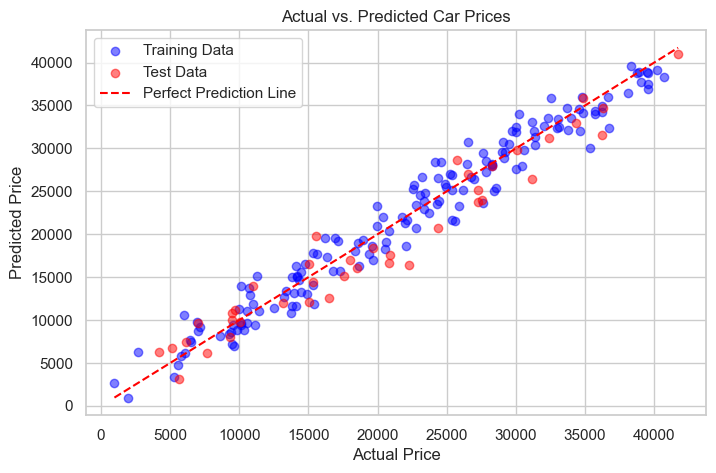

In [33]:
#Actual vs. Predicted Car Price values

#Initializes and trains the model
model = LinearRegression()
model.fit(X_train, y_train)

#Predicts the values
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Training Data')
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction Line')  #Perfect Prediction Line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.show()

Regarding this model diagnosis test, since values are relatively close to the Perfect Prediction Line, we can conclude that there don't appear to be any obvious signs of overfitting for both the training data and test data.

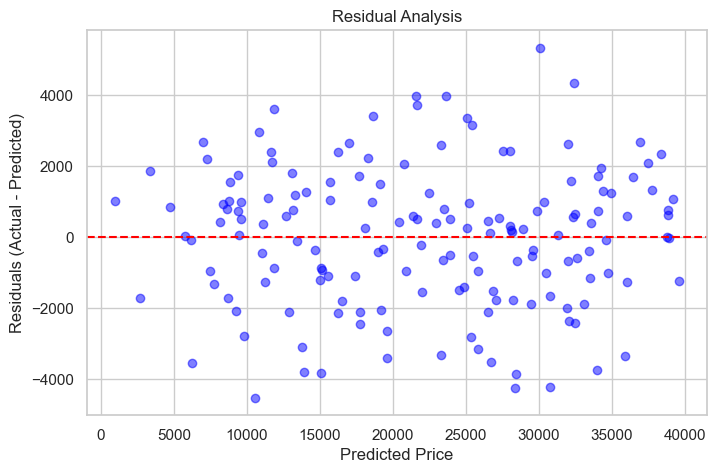

In [38]:
#Residual Analysis

plt.figure(figsize=(8,5))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Analysis")
plt.grid(True)
plt.show()

With this test, we can see that values are relatively spaced out indicating that there is actually homoskedacity in the data, proving that the covariance type of nonrobust in the OLS Regression Results was actually correct.

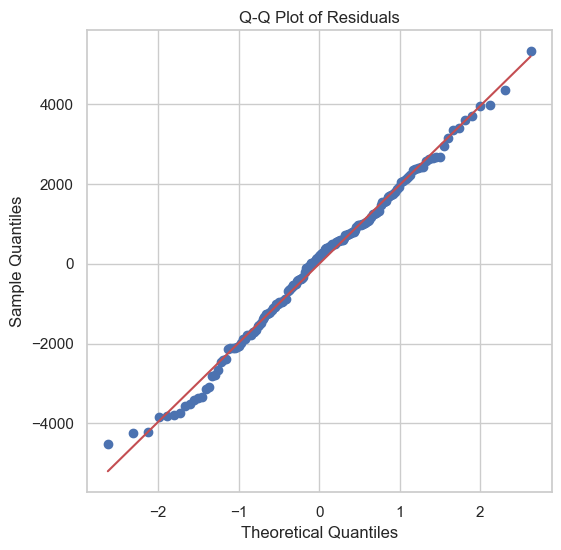

In [39]:
#Q-Q plot

residuals = y_train - y_train_pred  #Residuals (Actual - Predicted)

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

This test tests to see if there is instability in the data, which is indicated by deviations on the tails of the line.  There are deviations on the tails, and this was represented in the OLS Regression Results in the Condition Number, which was 66,300.